In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [37]:
#Exploring the data sets for 
outbreaks_df.count();

# Filling NaN values with 'Missing'
outbreaks_df.fillna('Missing');

#Checking value count after filling in nan's
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [38]:
#Grouping the data by state
states_group = outbreaks_df.groupby('State')

<AxesSubplot:xlabel='State'>

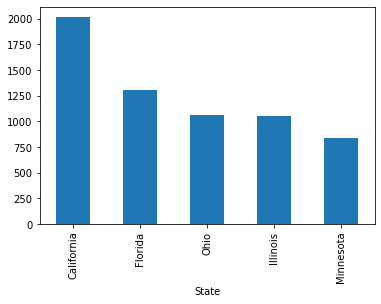

In [39]:
# Counting the number of hospitalizations per state
hosp_state = states_group['Hospitalizations'].count();

#Filtering out the 5 states with the most hospitalizations
top_hosp = hosp_state.sort_values(ascending=False).head(5);

#Plotting top hospitalization counts
top_hosp.plot.bar()



<AxesSubplot:title={'center':'Fatality Per State'}, xlabel='State'>

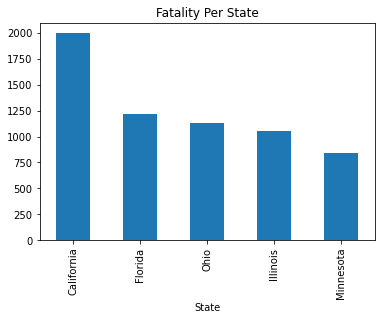

In [40]:
#Counting number of Fatalities per state
death_count = states_group['Fatalities'].count();

# Filtering out the states with the highest fatalities
top_deaths = death_count.sort_values(ascending=False).head(5);

# Plotting the Fatality count per state
top_deaths.plot.bar(title = 'Fatality Per State' ,)

In [ ]:
# Investigating correlation between Fatalities and Hospitalizations

<AxesSubplot:ylabel='Fatalities'>

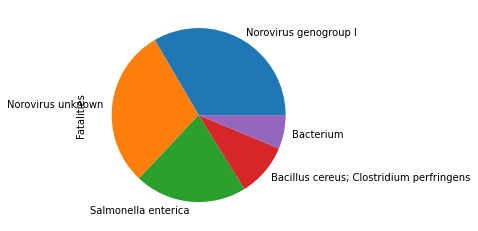

In [49]:
#Drilling down to a view of california outbreaks
cali_df = outbreaks_df[outbreaks_df['State'] == 'California'];

#Computing the 5 most common contaminants
cali_df.groupby('Species')['Fatalities'].count().sort_values(ascending=False).head(5).plot.pie()

In [42]:
#Correlation between number of hospitalizations and Fatalities?